In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [168]:
file_path = r"C:\Users\MY PC\OneDrive\Documents\New_Admission_Predict.csv.xlsx"
data = pd.read_excel(file_path)
data.columns = data.columns.str.strip()

In [170]:
data['Profile_Strength'] = (data['GRE Score'] + data['TOEFL Score'] + data['CGPA'] * 10) / 3

In [172]:
print("\nNull values in dataset:")
print(data.isnull().sum())


Null values in dataset:
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
Profile_Strength     0
dtype: int64


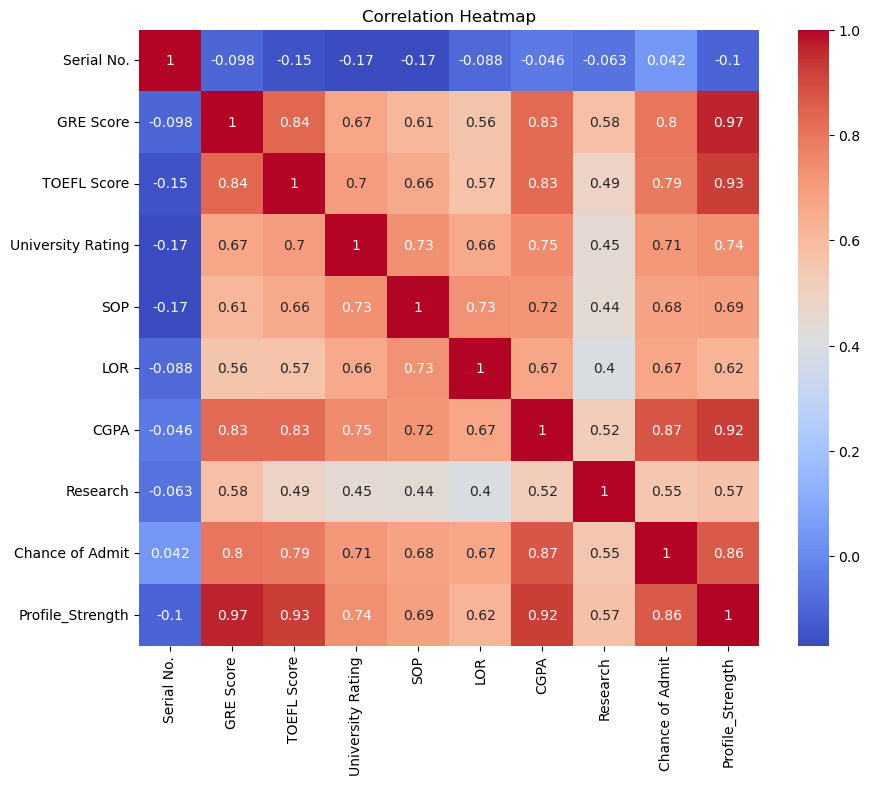

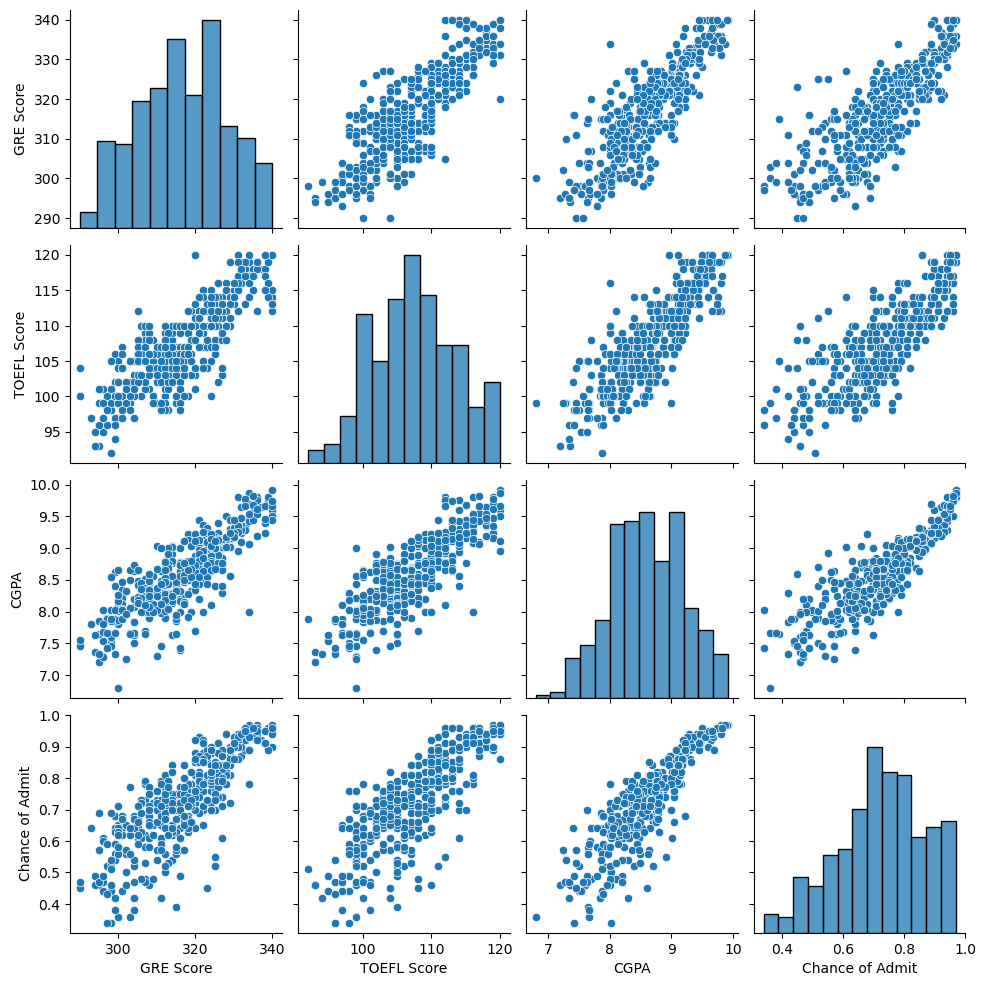

In [174]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
sns.pairplot(data[['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']])
plt.show()

In [175]:
X = data.drop(["Serial No.", "Chance of Admit"], axis=1)

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [177]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [178]:
models = {
    "Linear Regression": lr_model,
    "Ridge Regression": ridge_model,
    "Random Forest": rf_model
}

results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}
    print(f"{name} - MSE: {mse:.4f}, R2 Score: {r2:.4f}")


Linear Regression - MSE: 0.0046, R2 Score: 0.8230
Ridge Regression - MSE: 0.0046, R2 Score: 0.8210
Random Forest - MSE: 0.0048, R2 Score: 0.8137



Best Performing Model: Linear Regression


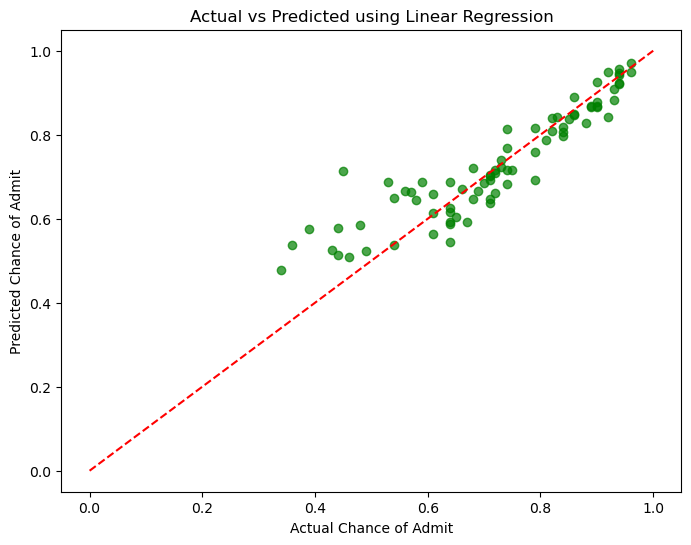

In [179]:
best_model_name = max(results, key=lambda x: results[x]['R2'])
print(f"\nBest Performing Model: {best_model_name}")

best_model = models[best_model_name]
y_best_pred = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_best_pred, alpha=0.7, color='green')
plt.xlabel("Actual Chance of Admit")
plt.ylabel("Predicted Chance of Admit")
plt.title(f"Actual vs Predicted using {best_model_name}")
plt.plot([0,1], [0,1], 'r--')
plt.show()

In [180]:
example = pd.DataFrame({
    'GRE Score': [320],
    'TOEFL Score': [110],
    'University Rating': [4],
    'SOP': [4.5],
    'LOR': [4.0],  
    'CGPA': [9.0],
    'Research': [1]
})

example['Profile_Strength'] = (example['GRE Score'] + example['TOEFL Score'] + example['CGPA']*10) / 3

# Match the training column order
example = example[X.columns]

prediction = best_model.predict(example)
print(f"\nPredicted Chance of Admission for Example Student: {prediction[0]:.2f}")



Predicted Chance of Admission for Example Student: 0.80
